In [1]:
import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.8.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x = np.arange(500)
noise = np.random.uniform(0,0.05,x.shape)
y = np.sin(np.pi*x/50)+np.sin(np.pi*x/20)+np.cos(np.pi*x/50)+noise

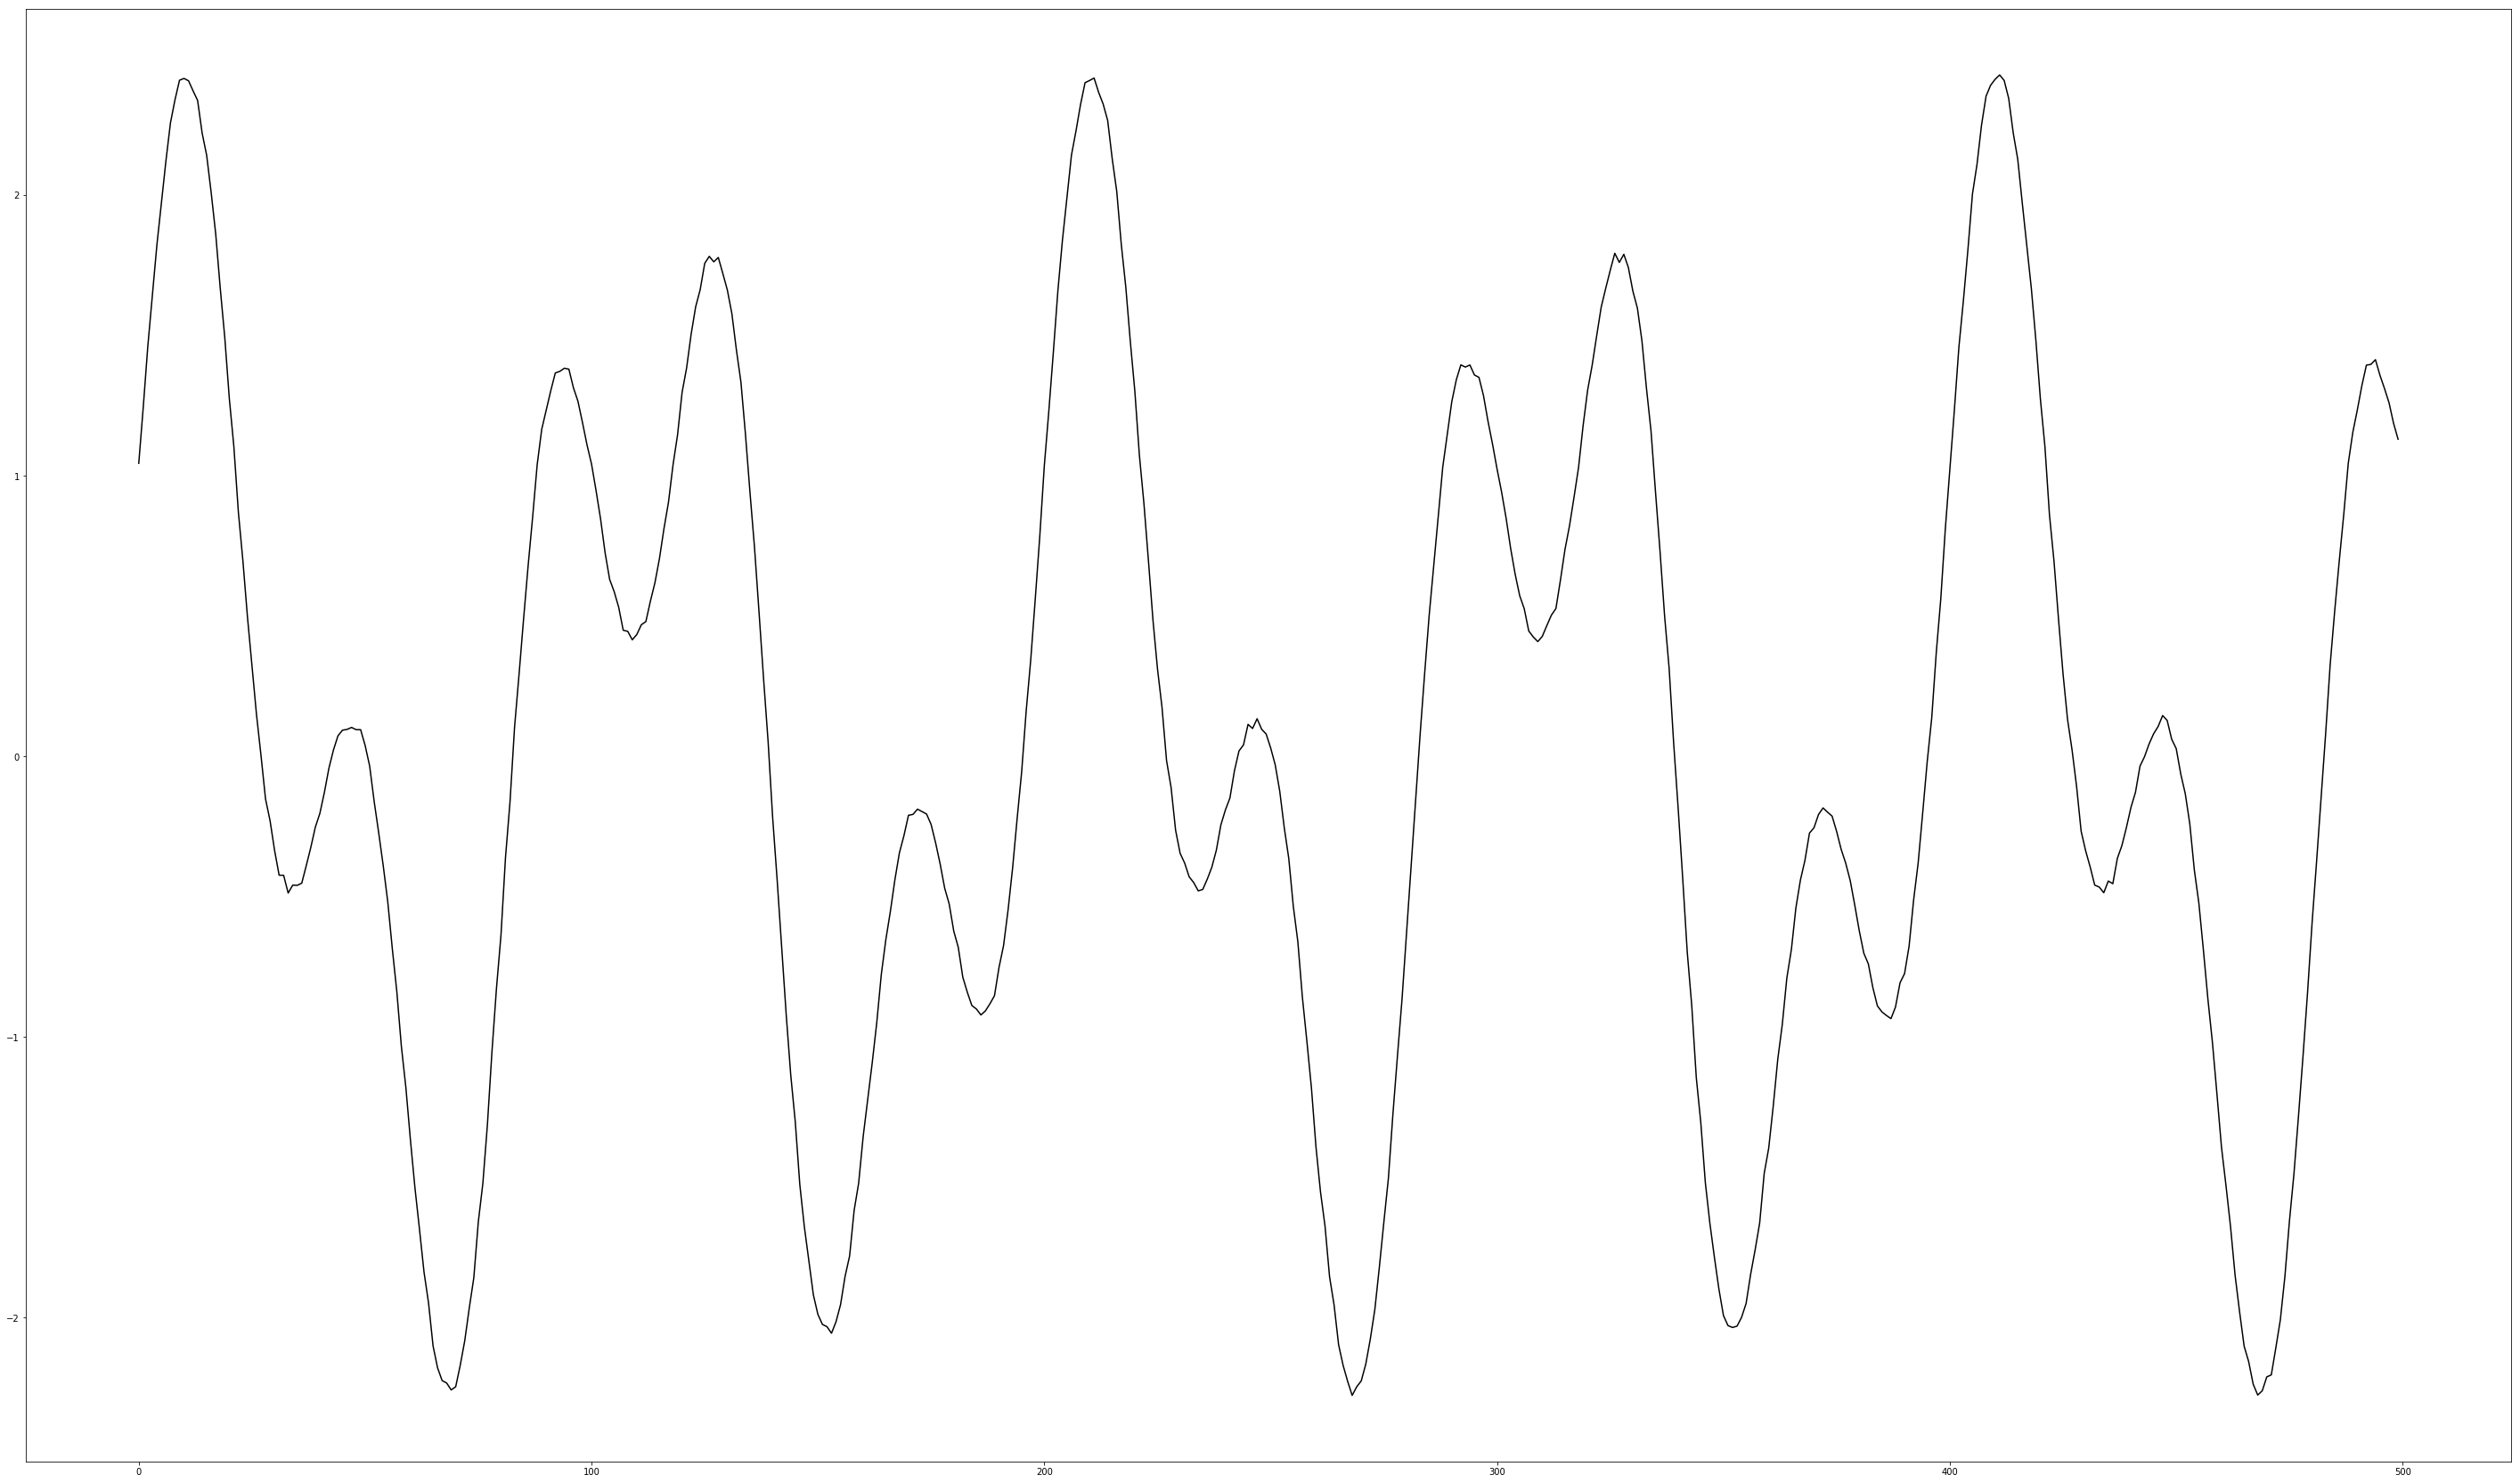

In [14]:
plt.figure(figsize=(50,30))
plt.plot(x,y,'k-')
plt.show()

In [81]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [82]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [83]:
def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

In [84]:
xs = tf.placeholder(dtype=tf.float32,shape=[None,784])
ys = tf.placeholder(dtype=tf.float32,shape=[None,10])

In [85]:
prediction = add_layer(xs,784,10,tf.nn.softmax)

In [86]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),axis =1))

In [87]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [88]:
init = tf.global_variables_initializer()

In [89]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

In [90]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(optimizer, feed_dict={xs: batch_xs, ys: batch_ys})
        if i % 50 == 0:
            print(compute_accuracy(
                mnist.test.images, mnist.test.labels))

0.0447
0.6533
0.7496
0.7959
0.8138
0.8254
0.8386
0.8438
0.8518
0.85
0.8594
0.8631
0.8618
0.8634
0.8643
0.8722
0.872
0.8748
0.8748
0.8768


In [102]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

def add_layer(inputs,in_size,out_size,n_layer,Activition_Function = None):
	layer_name = "Layer%s" % n_layer
	with tf.name_scope('Add_Layer'):
		with tf.name_scope("Weights"):
			weights = tf.Variable(tf.random_normal([in_size,out_size]),dtype=tf.float32)
			tf.summary.histogram(layer_name+'/weights',weights)
		with tf.name_scope("bias"):
			bias = tf.Variable(tf.zeros([1,out_size])+0.1,dtype=tf.float32)
			tf.summary.histogram(layer_name+'/bias',bias)
		with tf.name_scope("Wx_plus_b"):
			y = tf.matmul(inputs,weights) + bias
		if Activition_Function is None:
			outputs = y
		else:
			outputs = Activition_Function(y)
		tf.summary.histogram(layer_name+'/outputs',outputs)
	return outputs

with tf.name_scope("Inputs"):
	xs = tf.placeholder(dtype=tf.float32,shape =[None,784],name='X')
	ys = tf.placeholder(dtype=tf.float32,shape = [None,10],name= "Y")

with tf.name_scope("Layers"):
	prediction = add_layer(xs,784,10,1,tf.nn.softmax)

with tf.name_scope("Loss"):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),axis=1))
    tf.summary.scalar("loss",cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

def compute_accuracy(v_xs,v_ys):
    global prediction
    y_pred = sess.run(prediction,feed_dict={xs:v_xs,ys:v_ys})
    correct_prediction = tf.equal(tf.argmax(y_pred,1),tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result = sess.run(accuracy,feed_dict={xs:v_xs,ys:v_ys})
    return result
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("graphs/",sess.graph)
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(optimizer, feed_dict={xs: batch_xs, ys: batch_ys})
        if i % 50 == 0:
#             results = sess.run(merged,feed_dict={xs: batch_xs, ys: batch_ys})
            print(compute_accuracy(
                mnist.test.images, mnist.test.labels))
#             writer.add_summary(results,i)
# 	for i in range(1000):
# 		sess.run(optimizer,feed_dict={X:x,Y:y})
# 		if i % 50 == 0:
# 			results = sess.run(merged,feed_dict={X:x,Y:y})
# 			print('loss:',sess.run(loss,feed_dict={X:x,Y:y}))
# 			writer.add_summary(results,i)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.1356
0.6569
0.7503
0.7793
0.8078
0.819
0.8311
0.8418
0.84
0.8466
0.8599
0.8649
0.8617
0.8648
0.8668
0.8678
0.8722
0.8736
0.8761
0.8794


In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

with tf.name_scope("Inputs"):
    xs = tf.placeholder(dtype=tf.float32,shape=[None,784])
    ys = tf.placeholder(dtype=tf.float32,shape=[None,10])


def add_layer(inputs,in_size,out_size,n_layer,Activation_Function=None):
    layer_name = 'layer%s' % n_layer
    with tf.name_scope('Add_Layer'):
        with tf.name_scope("weights"):
            weights = tf.Variable(tf.random_normal([in_size,out_size]),dtype = tf.float32,name="W")
            tf.summary.histogram(layer_name+'/weights',weights)
            # weights = tf.Variable(tf.random_normal([in_size, out_size]), dtype=tf.float32)
        with tf.name_scope('bias'):
            # bias = tf.Variable(tf.zeros([1,out_size]),dtype=tf.float32)+0.1
            bias = tf.Variable(tf.zeros([1, out_size])+0.1, dtype=tf.float32,name='b')
            tf.summary.histogram(layer_name + '/bias', bias)
        with tf.name_scope("Wx_plus_b"):
            y = tf.matmul(inputs,weights)+bias
            # y = tf.matmul(inputs, weights) + bias
        if Activation_Function is None:
            outputs = y
        else:
            outputs = Activation_Function(y)
        tf.summary.histogram(layer_name + '/outputs', outputs)
    return outputs
def compute_accuracy(v_xs,v_ys):
    global prediction
    y_pred = sess.run(prediction,feed_dict={xs:v_xs,ys:v_ys})
    correct_prediction = tf.equal(tf.argmax(y_pred,1),tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result = sess.run(accuracy,feed_dict={xs:v_xs,ys:v_ys})
    return result
with tf.name_scope("Layers"):
    prediction = add_layer(xs,784,10,1,tf.nn.softmax)

with tf.name_scope('Loss_Function'):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),axis=1))
    tf.summary.scalar("loss",cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('graphs/',sess.graph)
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(optimizer, feed_dict={xs: batch_xs, ys: batch_ys})
        if i % 50 == 0:
#             results = sess.run(merged,feed_dict={xs: batch_xs, ys: batch_ys}))
            results = sess.run(merged,feed_dict={xs:batch_xs,ys:batch_ys})
            print(compute_accuracy(mnist.test.images, mnist.test.labels))
            writer.add_summary(results,i)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
0.0716
0.6407
0.7424
0.7817
0.807
0.8228
0.8327
0.8376
0.8448
0.8516
0.8544
0.8598
0.8595
0.8645
0.8655
0.8681
0.8647
0.8722
0.872
0.8759


In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [3]:
X_train.shape

(1257, 64)

In [4]:
y_train.shape

(1257, 10)

In [5]:
def add_layer(inputs,in_size,out_size,n_layer,keep_prob=1,activition_funtion=None):
    layer_name = 'layer%d' % n_layer
    with tf.name_scope('Add_layer'):
        with tf.name_scope("Weights"):
            weights = tf.Variable(tf.random_normal([in_size,out_size]),dtype=tf.float32)
        with tf.name_scope('bias'):
            bias = tf.Variable(tf.zeros([1,out_size])+0.1,dtype=tf.float32)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul(inputs,weights)+bias
            Wx_plus_b = tf.nn.dropout(Wx_plus_b,keep_prob)
        with tf.name_scope('outputs'):
            if activition_funtion is None:
                outputs = Wx_plus_b
            else:
                outputs = activition_funtion(Wx_plus_b)
            tf.summary.histogram(layer_name+'outputs/',outputs)
    return outputs

In [6]:
# def add_layer(inputs,in_size,out_size,n_layer,keep_prob=1,activition_funtion=None):
#     layer_name = 'layer%s' % n_layer
#     with tf.name_scope('Add_Layer'):
#         with tf.name_scope("weights"):
#             weights = tf.Variable(tf.random_normal([in_size,out_size]),dtype = tf.float32,name="W")

#             # weights = tf.Variable(tf.random_normal([in_size, out_size]), dtype=tf.float32)
#         with tf.name_scope('bias'):
#             # bias = tf.Variable(tf.zeros([1,out_size]),dtype=tf.float32)+0.1
#             bias = tf.Variable(tf.zeros([1, out_size])+0.1, dtype=tf.float32,name='b')

#         with tf.name_scope("Wx_plus_b"):
#             y = tf.matmul(inputs,weights)+bias
#             y = tf.nn.dropout(y,keep_prob)
#         if activition_funtion is None:
#             outputs = y
#         else:
#             outputs = activition_funtion(y)

#     return outputs

In [7]:
with tf.name_scope("inputs"):
    xs = tf.placeholder(dtype=tf.float32,shape=[None,64],name='X')
    ys = tf.placeholder(dtype=tf.float32,shape=[None,10],name="Y")

In [8]:
with tf.name_scope("Layers"):
    l1 = add_layer(xs,64,32,1,0.6,activition_funtion=tf.nn.tanh)
    prediction = add_layer(l1,32,10,2,0.6,activition_funtion=tf.nn.softmax)

In [9]:
with tf.name_scope("loss"):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum((tf.log(prediction) * ys),axis=1))
    tf.summary.scalar("loss",cross_entropy)

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [11]:
init = tf.global_variables_initializer()

In [12]:
with tf.Session() as sess:
    sess.run(init)
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('graphs/train/',sess.graph)
    test_writer = tf.summary.FileWriter('graphs/test/',sess.graph)
    for i in range(500):
        sess.run(optimizer,feed_dict={xs:X_train,ys:y_train})
        if i % 50 ==0:
            sess.run(merged,feed_dict={xs:X_train,ys:y_train})
            print("loss:",sess.run(cross_entropy,feed_dict={xs:X_train,ys:y_train}))
            train_results = sess.run(merged,feed_dict={xs:X_train,ys:y_train})
            test_results = sess.run(merged,feed_dict={xs:X_test,ys:y_test})
            train_writer.add_summary(train_results,i)
            test_writer.add_summary(test_results,i)

loss: 8.101937
loss: 4.339485
loss: 3.5822632
loss: 3.1746168
loss: 2.6846702
loss: 2.3534
loss: 2.2607465
loss: 2.1340015
loss: 2.0383599
loss: 2.0360568


In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
time_step = 28
batch_size = 128
hidden_units = 128
in_size = 28
out_size = 10
lr = 0.001
train_iteration = 10000

In [4]:
with tf.name_scope('placeholder'):
    xs = tf.placeholder(dtype=tf.float32,shape=[None,time_step,in_size],name="X")
    ys = tf.placeholder(dtype=tf.float32,shape = [None,out_size] ,name="Y")

In [5]:
with tf.name_scope('weights'):
    weights = {
        'in':tf.Variable(tf.random_normal([in_size,hidden_units]),dtype=tf.float32,'weights_in'),
        'out':tf.Variable(tf.random_normal([hidden_units,out_size]),dtype=tf.float32,'')
    }
with tf.name_scope('bias'):
    bias = {
        'in':tf.Variable(tf.constant(0.1,shape=[hidden_units]),dtype=tf.float32,name='bias_in'),
        'out':tf.Variable(tf.constant(0.1,shape=[out_size,]),dtype=tf.float32,name='bias_out')
    }

In [6]:
def RNN(xs,weights,bias):
    ##Iinput Dense
    ##xs.shape = (batchsize,timestep,insize)==>(batchsize*timestep,insize)
    xs = tf.reshape(xs,(-1,in_size))
    y = tf.matmul(xs,weights['in'])+bias['in']
    ## y.shape = (batchsize*timstep,hidden_units)==>(batchsize,timestep,hidden_units)
    x_in = tf.reshape(y,(-1,time_step,hidden_units))
    ##def rnn cell
    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(hidden_units,forget_bias=1.0,state_is_tuple=True)
    init_state = lstm_cell.zero_state(dtype=tf.float32,batch_size=batch_size)
    outputs, state = tf.nn.dynamic_rnn(cell = lstm_cell,inputs=x_in,initial_state=init_state,time_major=False)
    ##Output Dense
    output = tf.matmul(state[-1],weights['out'])+bias['out']
    return output

In [7]:
pred = RNN(xs,weights,bias)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys,logits=pred))
tf.summary.scalar('loss:',loss)
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

INFO:tensorflow:Summary name loss: is illegal; using loss_ instead.


In [8]:
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(ys,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
tf.summary.histogram('accuracy:',accuracy)

INFO:tensorflow:Summary name accuracy: is illegal; using accuracy_ instead.


<tf.Tensor 'accuracy_:0' shape=() dtype=string>

In [9]:
init = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess:
    sess.run(init)
    step = 0
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('/graphs',sess.graph)
    while step*batch_size < train_iteration:
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1,time_step,in_size)
        sess.run(optimizer,feed_dict={xs:batch_xs,ys:batch_ys})
        if step % 20 ==0:
            print(sess.run(accuracy,feed_dict={xs:batch_xs,ys:batch_ys}))
            results = sess.run(merged,feed_dict={xs:batch_xs,ys:batch_ys})
            writer.add_summary(results,step)
        step +=1

0.3359375
0.7265625
0.8203125
0.828125
